<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/tsla_lstm_training_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FULL CLEANUP: Remove All CUDA/cuDNN Traces
!apt-get remove --purge -y "cuda*" "libcudnn*" "libnvidia*" "nvidia*" "nsight*" || echo "Already clean"
!apt-get autoremove -y
!apt-get clean
!rm -rf /usr/local/cuda*
!rm -rf /usr/local/nvidia*
!rm -rf ~/.nv

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [ ]:
#Reinstall Correct TensorFlow and CUDA/cuDNN Stack
# Install dependencies
!apt-get update -y && apt-get install -y build-essential curl

# Reinstall TensorFlow with GPU Support (will auto-pull cuDNN)
!pip uninstall -y tensorflow
!pip install tensorflow==2.15.0

# Verify GPU setup
!python -c "import tensorflow as tf; print('TF Version:', tf.__version__); print('GPU Available:', tf.config.list_physical_devices('GPU'))"

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

2025-04-02 00:09:47.100706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-02 00:09:47.100770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-02 00:09:47.102341: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-02 00:09:49.031754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
TF Version: 2.15.0
2025-04-02 00:09:52.033423: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use 

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs available:", tf.config.list_physical_devices("GPU"))


TensorFlow version: 2.15.0
GPUs available: []


In [ ]:
# ================================
#Fix Potential Library Conflicts
# ================================
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [ ]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [ ]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,686 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,241 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8

In [ ]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [ ]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [ ]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 45.8 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [ ]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [ ]:
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv


#Load Dataset for Training
df_live = yf.download("TSLA", period="720d", interval="1h")
df_live.reset_index(inplace=True)
df = df_live.copy()

#Fix MultiIndex Issues (if applicable)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

#Remove Named Index (Fixes KeyError Issues)
df.reset_index(drop=True, inplace=True)


#Feature Engineering (Additional Indicators)
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))

    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()

    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())

    df.dropna(inplace=True)
    return df


#Apply Technical Indicators
df = compute_technical_indicators(df)


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 7, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/runtime.py", line 111, in get_version
    self.cudaRuntimeGetVersion(ctypes.byref(rtver))
    ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/runtime.py", line 65, in __getattr__
    self._initialize()
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/runtime.py", line 51, in _initialize
    self.lib = open_cudalib('cudart')
               ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/libs.py", line 84, in open_cudalib
    return ctypes.CDLL(path)
           ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
#Prepare Data for LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import joblib

#Select LSTM features
features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV', 'CCI']
df_lstm = df[features].copy()

#Normalize the features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_lstm)

#Save the scaler for future use
joblib.dump(scaler, 'lstm_scaler.pkl')

#Create sequences for supervised learning
X_lstm = []
y_lstm = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i])
    y_lstm.append(scaled_data[i, 0])  # Predict 'Close' price

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

#Train-test split
split_index = int(len(X_lstm) * 0.8)
X_train, X_test = X_lstm[:split_index], X_lstm[split_index:]
y_train, y_test = y_lstm[:split_index], y_lstm[split_index:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(
    50,
    return_sequences=True,
    input_shape=(X_train.shape[1], X_train.shape[2])
))  #Uses cuDNN automatically
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))



model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


#Save the LSTM model
model.save("lstm_trading_model_v1.h5")
print("LSTM model saved!")

Epoch 1/10
119/119 [==============================] - 22s 97ms/step - loss: 0.0033
Epoch 2/10
119/119 [==============================] - 13s 107ms/step - loss: 3.2684e-04
Epoch 3/10
119/119 [==============================] - 12s 97ms/step - loss: 2.8494e-04
Epoch 4/10
119/119 [==============================] - 12s 105ms/step - loss: 2.7409e-04
Epoch 5/10
119/119 [==============================] - 12s 100ms/step - loss: 2.5752e-04
Epoch 6/10
119/119 [==============================] - 12s 97ms/step - loss: 2.2809e-04
Epoch 7/10
119/119 [==============================] - 12s 99ms/step - loss: 2.4767e-04
Epoch 8/10
119/119 [==============================] - 10s 87ms/step - loss: 2.2462e-04
Epoch 9/10
119/119 [==============================] - 12s 97ms/step - loss: 2.1761e-04
Epoch 10/10
119/119 [==============================] - 12s 101ms/step - loss: 2.1027e-04
LSTM model saved!


/usr/local/lib/python3.11/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


30/30 [==============================] - 1s 34ms/step


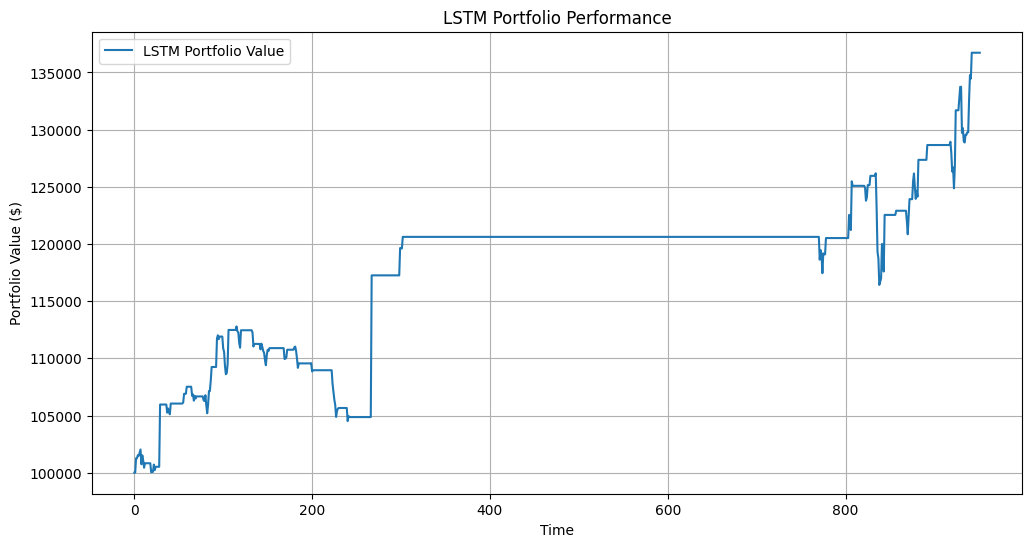

Final Balance: $136,723.34
Cumulative Return: 36.72%


In [ ]:
#Predict and Evaluate
predicted_prices = model.predict(X_test)

#Inverse transform predictions and actuals
test_close_scaled = y_test.reshape(-1, 1)
predicted_close_scaled = predicted_prices

close_scaler = MinMaxScaler()
close_scaler.min_, close_scaler.scale_ = scaler.min_[0], scaler.scale_[0]
predicted_close = close_scaler.inverse_transform(predicted_close_scaled)
actual_close = close_scaler.inverse_transform(test_close_scaled)

#Build simulated portfolio
initial_balance = 100000
balance = initial_balance
position = 0
portfolio_values_lstm = []

for i in range(len(actual_close)):
    if predicted_close[i] > actual_close[i] and position == 0:
        position = balance / actual_close[i]
        balance = 0
    elif predicted_close[i] < actual_close[i] and position > 0:
        balance = position * actual_close[i]
        position = 0
    portfolio_values_lstm.append(balance if balance > 0 else position * actual_close[i])

#Flatten and cast values for safe plotting and printing
portfolio_values_lstm = [float(p[0]) if isinstance(p, (np.ndarray, list)) else float(p) for p in portfolio_values_lstm]
final_balance_lstm = float(portfolio_values_lstm[-1])
cumulative_return = float(((final_balance_lstm / initial_balance) - 1) * 100)

#Plot LSTM Portfolio Performance
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values_lstm, label='LSTM Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.title('LSTM Portfolio Performance')
plt.legend()
plt.grid()
plt.show()

#Print Final Performance
print(f"Final Balance: ${final_balance_lstm:,.2f}")
print(f"Cumulative Return: {cumulative_return:.2f}%")


In [ ]:
#Save LSTM Results
from datetime import datetime

def generate_filename(stock="TSLA", model="lstm", version="v1", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"

results_path_json = generate_filename("TSLA", "lstm", "v1", "json")
with open(results_path_json, "w") as f:
    json.dump({
        "model_name": "LSTM",
        "final_value": float(final_balance_lstm),
        "cumulative_return": float(cumulative_return)
    }, f, indent=2)

print(f"LSTM portfolio results saved to: {results_path_json}")


LSTM portfolio results saved to: TSLA_lstm_v1_2025-04-02.json


In [ ]:
#Free GPU Memory Before Training
gc.collect()
torch.cuda.empty_cache()